In [26]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
#pip install plotly

-  Veri seti:https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [119]:
base_url="/Users/iremcakcak/Documents/data-science/data-science-homework3/data-science/data/heart/"
heart_dataset_url=base_url + "heart.csv"
saturation_dataset_url=base_url +"o2Saturation.csv"
drop_heart_dataset_url= base_url +"heart_data_drop.csv"

In [120]:
heart=pd.read_csv(heart_dataset_url)
saturation=pd.read_csv(saturation_dataset_url)
missing_heart=pd.read_csv(drop_heart_dataset_url)

- Age: Hastanın yaşı

- Sex: Hastanın cinsiyeti (erkek=1,kadın=0)

- exang: egzersize bağlı anjina (1 = evet; 0 = hayır)

- ca: büyük gemilerin sayısı (0-3)

- cp : Göğüs Ağrısı tipi göğüs ağrısı tipi

  -  Value 1: tipik anjina
  -  Value 2: atipik anjina
  -  Value 3: anjinal olmayan ağrı
  -  Value 4: asemptomatik

- trtbps : dinlenme kan basıncı (mm Hg cinsinden)

- chol : BMI sensörü aracılığıyla getirilen mg/dl cinsinden kolestoral

- fbs : (açlık kan şekeri > 120 mg/dl) (1 = doğru; 0 = yanlış) /(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : dinlenme elektrokardiyografi sonuçları

  -  Value 0: normal
  -  Value 1: ST-T dalgası anormalliğine sahip olmak (T dalga inversiyonları ve/veya > 0,05 mV ST yükselmesi veya çökmesi)-- [having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)]
  -  Value 2: Estes'e göre olası veya kesin sol ventriküler hipertrofiyi gösteriyor kriterler.
  

- Thalach: Ulaşılan maksimum kalp atış hızı

- target: 0= daha az kalp krizi olasılığı 1= daha fazla kalp krizi olasılığı

In [14]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
heart.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [16]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
heart.shape

(303, 14)

In [19]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [47]:
#Eksik değer sayısnı bulma
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: >

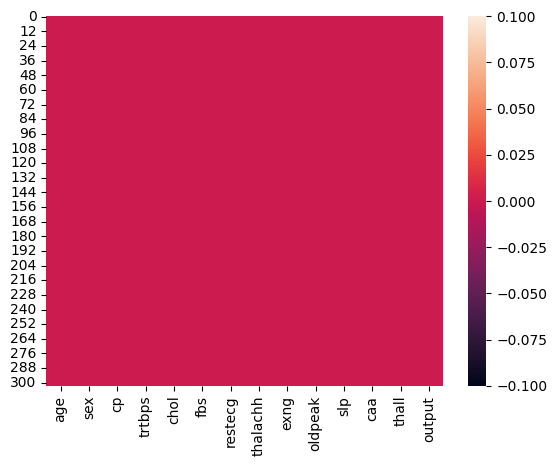

In [51]:

sns.heatmap(heart.isna())

##### Bu veri setinde boş değer olmadığı anlaşılıyor.

###  Cleanning Data

In [53]:
#tekrar eden satırların toplam sayısını bulma
heart.duplicated().sum()


1

In [56]:
#drop duplicates ile tekrar eden satırlar kaldırılır ve orijinal DataFrame'i değiştir.
display(heart.drop_duplicates(inplace=True)) 



None

In [57]:
#Kalp hastası olanların sayısını  bulma
heart['output'].value_counts()

output
1    164
0    138
Name: count, dtype: int64

##### 164 kişide kalp hastası,138 kişi kalp hastası değil bilgisine ulaşıyoruz.

In [61]:
#cinsiyete göre hasta sayısı
heart[(heart['output'] == 1) & (heart['sex'] == 1)]['sex'].value_counts()

sex
1    92
Name: count, dtype: int64

In [62]:
numberofFemale = len(heart[heart.sex == 0])
numberofMale = len(heart[heart.sex == 1])
percentage_of_females = (numberofFemale / (len(heart.sex) * 100))
percentage_of_males = (numberofMale / (len(heart.sex) * 100))
print(f"Kadın Hasta Oranı: ",percentage_of_females)
print(f"Erkek Hasta Oranı: ",percentage_of_males)

Kadın Hasta Oranı:  0.0031788079470198675
Erkek Hasta Oranı:  0.006821192052980133


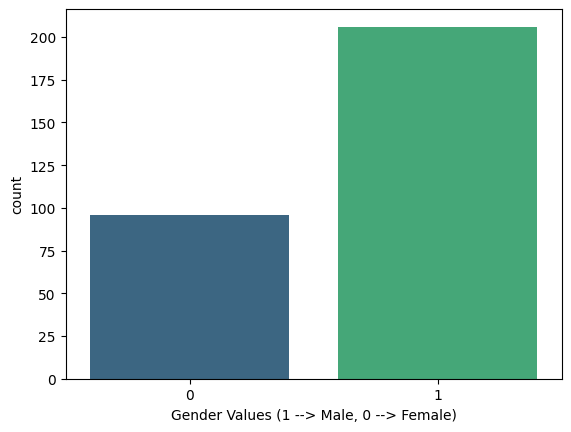

In [69]:
sns.countplot(x = "sex", hue='sex',data = heart, palette='viridis', legend=False)
plt.xlabel("Gender Values (1 --> Male, 0 --> Female)")
plt.show()

#####  Yukarıdaki  grafikte ise cinsiyet öznitelğine bağlı olarak hastalık bulunma değerlerini gözlemledim.Bu veri örnekleminden yola çıkarak "Erkeklerin kadınlara oranla kalp rahatsızlığı olma durumu belirgin bir şekilde fazla bulunuyor" diyebiliriz

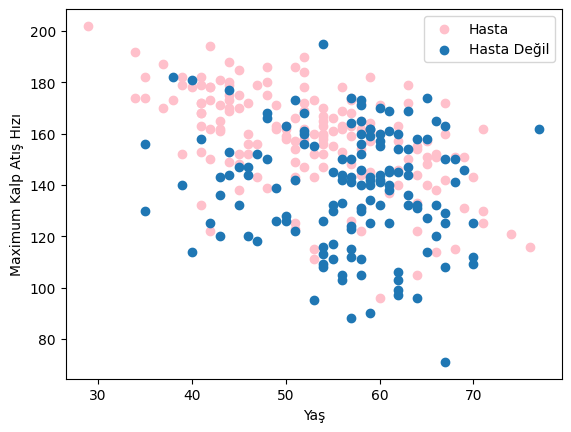

In [73]:
plt.scatter(x = heart.age[heart.output == 1], y = heart.thalachh[(heart.output== 1)], c = "pink")
plt.scatter(x = heart.age[heart.output == 0], y = heart.thalachh[heart.output == 0])
plt.legend(["Hasta","Hasta Değil"])
plt.xlabel("Yaş")
plt.ylabel("Maximum Kalp Atış Hızı")
plt.show()

##### Yaşlara göre kalp atış hızı ile ilşkilendirilmiş 2 boyutlu bir grafite 2 farklı öznitelik ile beraber düşünüldiğinde hasta olma durumunun 30'lu yaşların başından 60'lı yaşlara göre daha baskın oluştuğu görülür.Hasta olmama durumu ise genellikle 50 ile 70 yaşları arasında daha çok gruplanmış gibi görünüyor

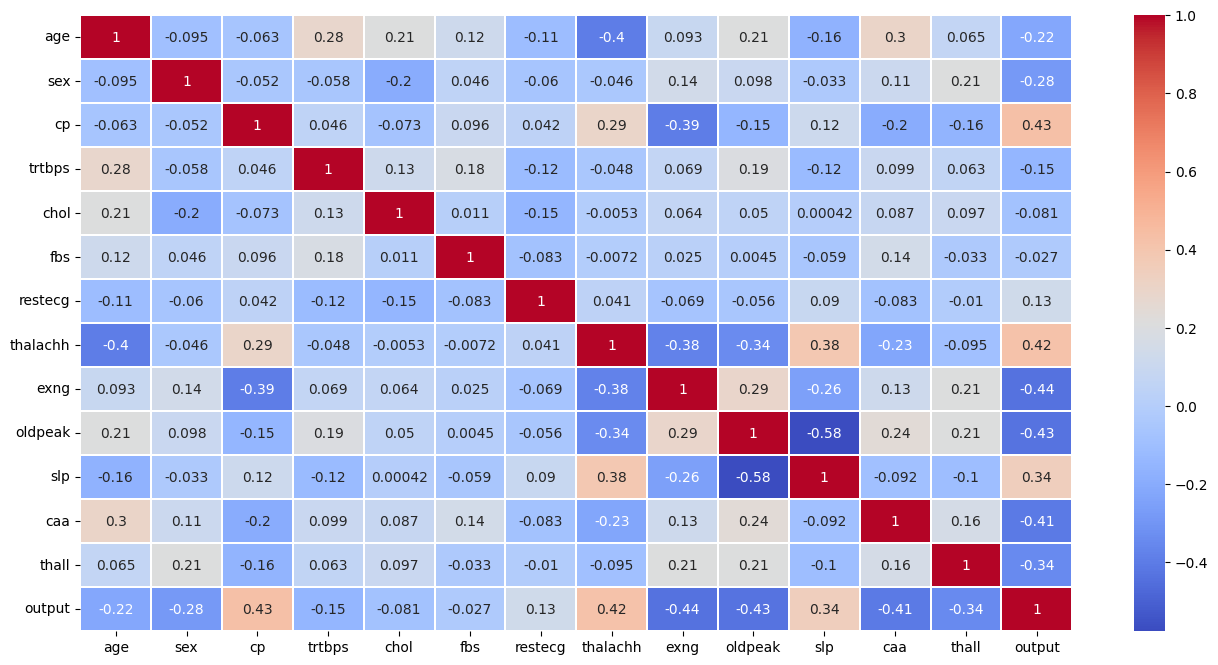

In [74]:
plt.figure(figsize=(16,8))
sns.heatmap(heart.corr(), annot = True, cmap = 'coolwarm', linewidths = .1)
plt.show()
# bir ısı haritasında annot=True olarak ayarlanırsa, her hücre içine karşılık gelen değer yazılır. 

##### Yukarıdaki  ısı haristasında her bir kolonun korelasyon (ilişki) analizi yapılmıştır "Oldpeak", "FastingBS" ve "RestingBP"  pozitif korelasyon

In [42]:
#px.imshow(heart.corr(),title="Correlation Plot of the Heat Failure Prediction")
#hata  çözümlenemedi.

/var/folders/t9/_qmn6d053sg_p1qcpsxpp7zr0000gn/T/ipykernel_4751/1998227607.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='thalachh'>

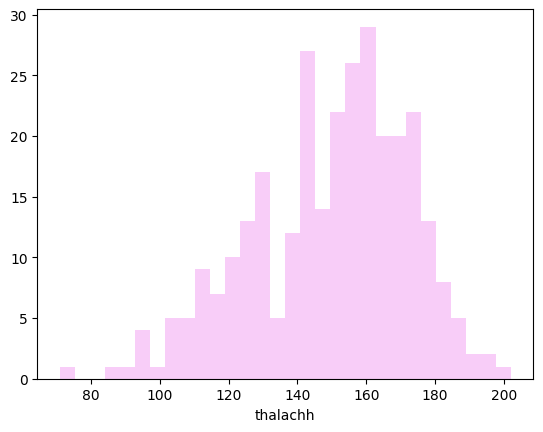

In [84]:
#Erişilen Maksimum kalp hızı oranları (thalach: maximum heart rate achieved)
sns.distplot(heart['thalachh'], kde = False, bins = 30, color = 'violet')

##### Eksik veri olmadığı için datasetin  bazı verileri silip yenş csv üzerinden işlem yapacağım.

##### Eksik veriler için temel olarak iki strateji bulunmaktadır: 
  - 1-Silme (Deletion) ve 2-Doldurma (İmputation)
  - Silme kendi içerisinde kolon bazlı, satır bazlı (listwise) ve eşlerin (pairwise) silinmesi olarak ayrışmaktadır.
  - Doldurma işlemi ise Zaman Serileri için ayrı, Genel Modeller için ayrı biçimde ayrışmaktadır.

In [121]:
missing_heart.isna().sum()

age         19
sex         10
cp           0
trtbps       0
chol         1
fbs          0
restecg      0
thalachh     0
exng         0
oldpeak      0
slp          1
caa          1
thall        2
output       6
dtype: int64

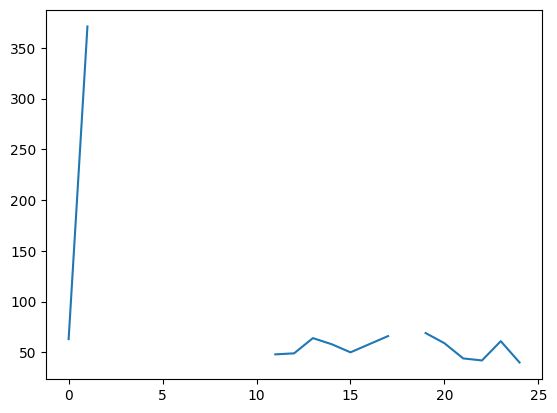

In [125]:
#Eksik verilerin bulunduğu kolonlarda belirli bir satır [0 ile 25 (dahil değil) arası] aralığına kadar görüntüleme 
missing_heart['age'][0:25].plot()
plt.show()


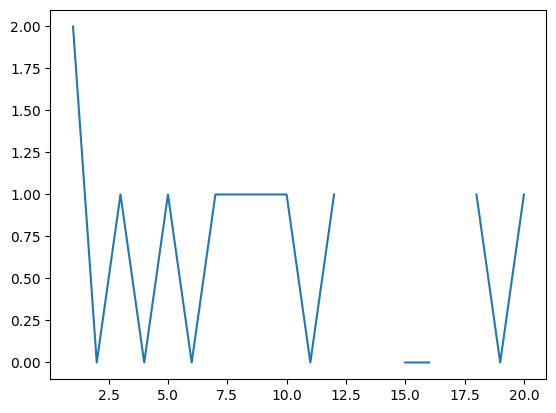

In [126]:
missing_heart['sex'][0:25].plot()
plt.show()

#### Eksik verilerin silinmesi


In [127]:
#satır bazında silme fonksiyonu
mh1 = missing_heart.dropna() 
mh1[[ 'age', 'sex']]

,age,sex
3,56.0,1.0
5,57.0,1.0
9,57.0,1.0
11,48.0,0.0
15,50.0,0.0
...,...,...
296,57.0,0.0
297,45.0,1.0
298,68.0,1.0
299,57.0,1.0


In [130]:
#kolon bazlı silme fonksiyonu
mh2 = missing_heart.drop(columns="sex") 
mh2

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,3,145,233.0,1,0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,371.0,130,250,0.0,1,187,0.0,3.5,0.0,0.0,2.0,1.0,NaN
2,NaN,1,130,204.0,0,0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1,120,236.0,0,1,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,NaN,0,120,354.0,0,1,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0,140,241.0,0,1,123.0,1.0,0.2,1.0,0.0,3.0,0.0
297,45.0,3,110,264.0,0,1,132.0,0.0,1.2,1.0,0.0,3.0,0.0
298,68.0,0,144,193.0,1,1,141.0,0.0,3.4,1.0,2.0,3.0,0.0
299,57.0,0,130,131.0,0,1,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [132]:
#Eşlerin (Pairwise) Silinmesi: Bu yöntemde sadece ihtiyaç duyulan değişkenler seçilir ve bu değişkenler içindeki eksik veriler silinir.
ms3 = missing_heart
ms3[[ 'age', 'sex', 'thall']]


,age,sex,thall
0,63.0,NaN,1.0
1,371.0,2.0,1.0
2,NaN,0.0,2.0
3,56.0,1.0,2.0
4,NaN,0.0,2.0
...,...,...,...
296,57.0,0.0,3.0
297,45.0,1.0,3.0
298,68.0,1.0,3.0
299,57.0,1.0,3.0


### Eksik Verilerin Doldurulması


In [133]:
missing_heart['age']

0       63.0
1      371.0
2        NaN
3       56.0
4        NaN
       ...  
296     57.0
297     45.0
298     68.0
299     57.0
300     57.0
Name: age, Length: 301, dtype: float64

In [136]:
#üst değer ile doldurma
mh5=missing_heart
mh5['age'].fillna(method="ffill")

/var/folders/t9/_qmn6d053sg_p1qcpsxpp7zr0000gn/T/ipykernel_4751/1986333419.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



0       63.0
1      371.0
2      371.0
3       56.0
4       56.0
       ...  
296     57.0
297     45.0
298     68.0
299     57.0
300     57.0
Name: age, Length: 301, dtype: float64

In [137]:
# Sabit değer atama
mh6 = missing_heart
mh6['age'].fillna(value= "53.0")

0       63.0
1      371.0
2       53.0
3       56.0
4       53.0
       ...  
296     57.0
297     45.0
298     68.0
299     57.0
300     57.0
Name: age, Length: 301, dtype: object

#### Lineer regrasyonla eksik veriler tahminedilmeye çalışır.

In [140]:
mh6_reg=mh6[['age','sex','cp','chol','thalachh']]
mh6_reg

,age,sex,cp,chol,thalachh
0,63.0,NaN,3,233.0,150.0
1,371.0,2.0,130,0.0,0.0
2,NaN,0.0,1,204.0,172.0
3,56.0,1.0,1,236.0,178.0
4,NaN,0.0,0,354.0,163.0
...,...,...,...,...,...
296,57.0,0.0,0,241.0,123.0
297,45.0,1.0,3,264.0,132.0
298,68.0,1.0,0,193.0,141.0
299,57.0,1.0,0,131.0,115.0


##### histogramlarda sağlıksız ve sağlıklı kişilerin karşılaştırılması